# Car Price Prediction Model

This notebook presents a linear regression model to predict car prices based on various features. The goal is to understand which factors contribute most to car pricing and to develop a model that can predict prices accuratel.
by **ABRIL Sanaa**

# Initial Data Loading and Overview

We start by importing `pandas`, a powerful Python library for data manipulation, and load our dataset from the 'Cars_Datasets.csv' file into a DataFrame. The initial examination of the data with `head()` provides a quick look at the first few entries.

Next, we collect basic information about our dataset:
- The total number of rows and columns, which gives us an idea of the dataset's size.
- The names of the columns, to understand the features we have.
- The data types of each column, to identify if they align with expected types (numerical, categorical).

We also perform a nullity check across the dataset to find any missing values per column.

Lastly, the `describe()` function offers a statistical summary for numerical columns, providing insights such as mean values, standard deviations, and range (min-max), which are essential for understanding the distribution of our data.


In [17]:
import pandas as pd

# Load the dataset
file_path = 'Cars_Datasets.csv'
data = pd.read_csv(file_path, sep=';')


data.head()

,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,Boite de vitesses,Première main,État,Prix
0,Fiat,Punto,2007,200 000 - 249 999,Diesel,5,Manuelle,Non,Très bon,60000
1,Dacia,Dokker Van,2013,400 000 - 449 999,Diesel,6,Manuelle,Non,Excellent,70000
2,Dacia,Dokker,2014,160 000 - 169 999,Diesel,6,Manuelle,NaN,Très bon,90000
3,Volkswagen,Touareg,2005,0 - 4 999,Diesel,10,Automatique,Oui,Excellent,90000
4,Toyota,Prado,2007,200 000 - 249 999,Diesel,12,Manuelle,Non,Excellent,97000


In [5]:
basic_info = {
    "Number of Rows": data.shape[0],
    "Number of Columns": data.shape[1],
    "Column Names": data.columns.tolist(),
    "Data Types": data.dtypes
}
missing_values = data.isnull().sum()
basic_info, missing_values

({'Number of Rows': 24776,
  'Number of Columns': 10,
  'Column Names': ['Marque',
   'Modèle',
   'Année-Modèle',
   'Kilométrage',
   'Type de carburant',
   'Puissance fiscale',
   'Boite de vitesses',
   'Première main',
   'État',
   'Prix'],
  'Data Types': Marque               object
  Modèle               object
  Année-Modèle          int64
  Kilométrage          object
  Type de carburant    object
  Puissance fiscale     int64
  Boite de vitesses    object
  Première main        object
  État                 object
  Prix                  int64
  dtype: object},
 Marque                  0
 Modèle                  0
 Année-Modèle            0
 Kilométrage             0
 Type de carburant       0
 Puissance fiscale       0
 Boite de vitesses       0
 Première main        6209
 État                 6678
 Prix                    0
 dtype: int64)

In [6]:
data.describe()

,Année-Modèle,Puissance fiscale,Prix
count,24776.000000,24776.000000,2.477600e+04
mean,2011.844244,7.193938,2.169588e+05
std,5.462925,1.574124,6.749569e+06
min,1990.000000,5.000000,6.000000e+04
25%,2008.000000,6.000000,7.500000e+04
50%,2013.000000,7.000000,1.000000e+05
75%,2016.000000,8.000000,1.400000e+05
max,2022.000000,14.000000,6.120372e+08


# Encoding Categorical Variables and Feature Engineering

To prepare our dataset for modeling, we need to convert categorical variables into a format that can be provided to machine learning algorithms. We achieve this by using label encoding, which converts each category into a unique integerWe then split the 'Kilométrage' column into 'min_kilometrage' and 'max_kilometrage', representing the range of mileage for the cars. We clean these new features to remove any extra spaces and convert them into numeric format for analysis. The original 'Kilométrage' column is subsequently dropped as it's now redundant..


In [18]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of label encoder
le = LabelEncoder()

# Apply Label Encoding
data['Marque'] = le.fit_transform(data['Marque'])
data['Modèle'] = le.fit_transform(data['Modèle'])
data['Type de carburant'] = le.fit_transform(data['Type de carburant'])
data['Boite de vitesses'] = le.fit_transform(data['Boite de vitesses'])
data['Première main'] = le.fit_transform(data['Première main'])
data['État'] = le.fit_transform(data['État'])



In [19]:
# Split the 'kilometrage' column
import numpy as np
data[['min_kilometrage', 'max_kilometrage']] = data['Kilométrage'].str.split('-', expand=True)

# Clean the string values and convert them to numeric
data['min_kilometrage'] = pd.to_numeric(data['min_kilometrage'].str.replace(" ", "").replace("", np.nan))
data['max_kilometrage'] = pd.to_numeric(data['max_kilometrage'].str.replace(" ", "").replace("", np.nan))

#drop the original 'kilometrage' column 
data.drop('Kilométrage', axis=1, inplace=True)

# Check the first few rows to verify the changes
print(data.head())



   Marque  Modèle  Année-Modèle  Type de carburant  Puissance fiscale  \
0       6     272          2007                  0                  5   
1       5     159          2013                  0                  6   
2       5     158          2014                  0                  6   
3      21     331          2005                  0                 10   
4      20     270          2007                  0                 12   

   Boite de vitesses  Première main  État   Prix  min_kilometrage  \
0                  2              0     5  60000           200000   
1                  2              0     3  70000           400000   
2                  2              2     5  90000           160000   
3                  1              1     3  90000                0   
4                  2              0     3  97000           200000   

   max_kilometrage  
0           249999  
1           449999  
2           169999  
3             4999  
4           249999  


# Data Visualization and Analysis
:

- First, we print descriptive statistics with the `describe()` method to summarize the central tendency, dispersion, and shape of the dataset's numerical features distribution.

- Next, we compute a correlation matrix, which measures the linear relationships between the variables. The matrix is visualized as a heatmap, providing an intuitive picture of how the features correlate with each other. Values close to 1 or -1 indicate a strong positive or negative correlation, respectively.

- Finally, we analyze the average car price based on the type of gearbox to see if there's a significant difference in prices. This could provide insights into the impact of gearbox type on car valuation.


             Marque        Modèle  Année-Modèle  Type de carburant  \
count  24776.000000  24776.000000  24776.000000       24776.000000   
mean      11.818615    189.776639   2011.844244           0.174201   
std        6.221745     95.599618      5.462925           0.565262   
min        0.000000      0.000000   1990.000000           0.000000   
25%        6.000000    129.000000   2008.000000           0.000000   
50%       12.000000    186.000000   2013.000000           0.000000   
75%       16.000000    263.000000   2016.000000           0.000000   
max       22.000000    368.000000   2022.000000           3.000000   

       Puissance fiscale  Boite de vitesses  Première main          État  \
count       24776.000000       24776.000000   24776.000000  24776.000000   
mean            7.193938           1.587100       0.774822      4.177147   
std             1.574124           0.690662       0.822016      1.707672   
min             5.000000           0.000000       0.000000      0

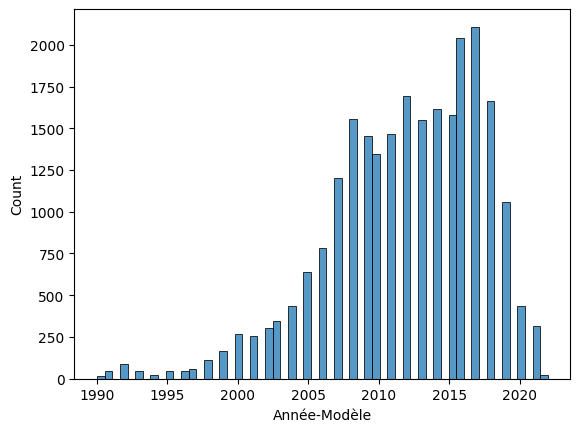

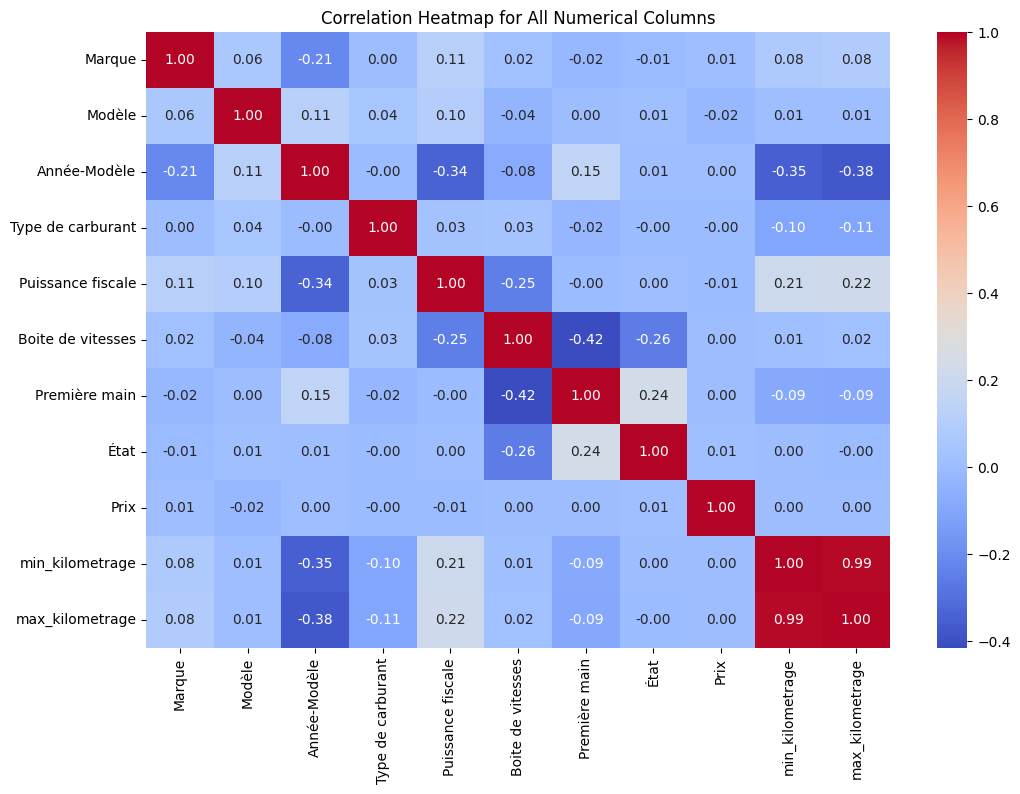

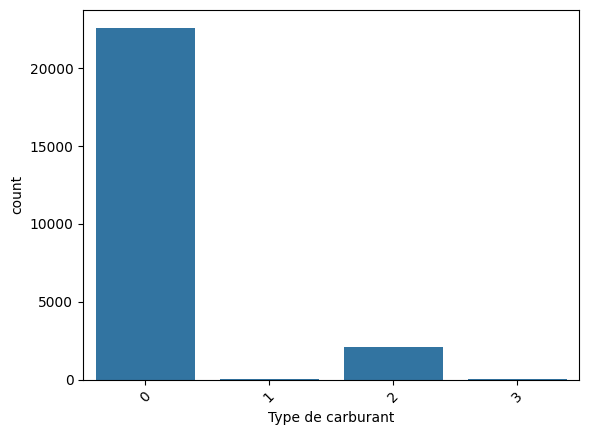

Boite de vitesses
0    148263.523744
1    221829.717972
2    227164.458457
Name: Prix, dtype: float64


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for numerical features
print(data.describe())

# Heatmap for numerical features
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for All Numerical Columns')
plt.show()


# Average price by gearbox type
print(data.groupby('Boite de vitesses')['Prix'].mean())


# Feature Transformation: Calculating Car Age

To enhance our model's predictive accuracy, we transform the 'Année-Modèle' feature into a more informative one — the car's age. This is achieved by subtracting the car's model year from the current year, giving us the age of the car in yearate.


In [20]:
from datetime import datetime

# converting 'Année-Modèle' to car's Age
current_year = datetime.now().year
data['Age'] = current_year - data['Année-Modèle']

# Verify the new column has been added
print(data[['Année-Modèle', 'Age']].head())


   Année-Modèle  Age
0          2007   17
1          2013   11
2          2014   10
3          2005   19
4          2007   17


# Correlation with Target Variable

To identify the strength and direction of the relationship between the features and the target variable 'Prix', we compute the correlation coefficients. These coefficients range from -1 to 1, where:

- 1 indicates a strong positive correlation.
- -1 indicates a strong negative correlation.
- Values close to 0 suggest no linear correlation.

We specifically look at the correlation values related to 'Prix' and sort them in descending order. This helps us understand which features have the most significant positive or negative linear relationship with the car prices.


In [40]:
correlation_matrix = data.corr()
print(correlation_matrix['Prix'].sort_values(ascending=False))


Prix                 1.000000
État                 0.012719
Marque               0.007634
Année-Modèle         0.004347
Première main        0.004001
Boite de vitesses    0.003271
min_kilometrage      0.001429
max_kilometrage      0.000040
Type de carburant   -0.003694
Age                 -0.004347
Puissance fiscale   -0.005784
Modèle              -0.021065
Name: Prix, dtype: float64


# Outlier Handling: Capping the Target Variable

We address potential outliers in the 'Prix' variable by capping it at the 95th percentile. This means that all values above this threshold are set to the 95th percentile value. The choice of the 95th percentile helps to mitigate the influence of extreme outliers without discarding a significant portion of the data.

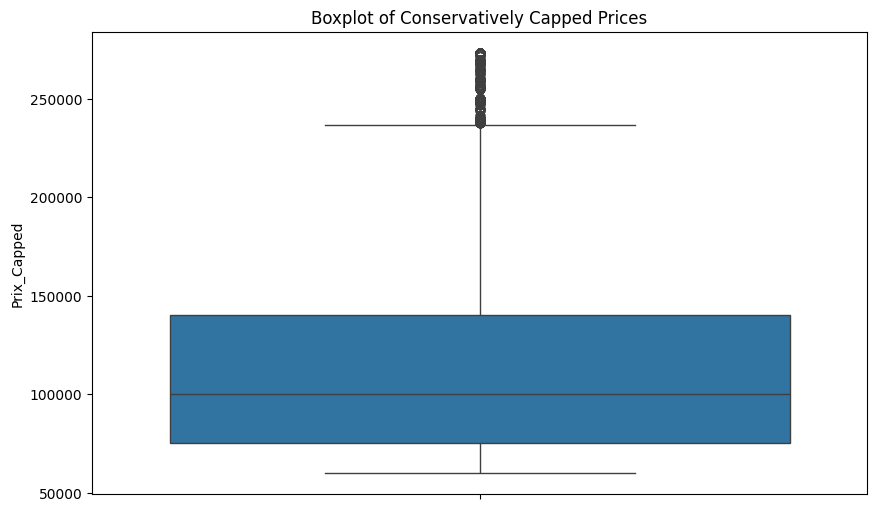

In [21]:
# Calculate the 95th percentile value
p95 = data['Prix'].quantile(0.95)

# Cap the 'Prix' values at the 95th percentile
data['Prix_Capped'] = data['Prix'].clip(upper=p95)

# Now let's plot the boxplot again
plt.figure(figsize=(10, 6))
sns.boxplot(data['Prix_Capped'])
plt.title('Boxplot of Conservatively Capped Prices')
plt.show()


# Model Training and Evaluation

With our preprocessed dataset, we now proceed to train a Linear Regression modes.

## Preparing the Dataset
We create a feature matrix `X` with our selected features and a target variable `y`, which is the 'Prix_Capped' column. To normalize the distribution and potentially improve model performance, we apply a logarithmic transformation to the target variable, `y_log`.

## Splitting the Dataset
The dataset is split into training and testing sets using an 80-20 ratio, ensuring that we have a separate dataset to evaluate our model's performance.

## Feature Scaling
We standardize our features to have a mean of zero and a standard deviation of one. This is an important step when using models that are sensitive to the scale of the data, such as Linear Regression with regularization.

## Model Training
The Linear Regression model is trained on the scaled training data. We use the log-transformed target for training because models typically perform better when the target variable's distribution is approximately normal.

## Predictions and Evaluation
We use the trained model to make predictions on the test data, which are then transformed back to the original scale using the exponential function, as our target was log-transformed.

Finally, we calculate the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared metrics on the log scale. These metrics will help us quantify the model's accuracy and fit. A lower MSE and RMSE indicate a better fit, while an R-squared closer to 1 suggests that our model can explain a higher proportion of the variance in the target variable.


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Define features
features = ['Age', 'Marque', 'Modèle', 'Puissance fiscale', 'Type de carburant', 'Première main', 'Boite de vitesses', 'min_kilometrage', 'max_kilometrage']

X = data[features]  # Feature set
y = data['Prix_Capped']    # Target variable

# Log-transform the target variable to improve linearity
y_log = np.log(y)

# Split the data into training and testing sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model on the scaled training data
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train_log)

# Predict on the transformed test set
y_pred_log = linear_reg.predict(X_test_scaled)

# Convert the log predictions back to the original scale
y_pred = np.exp(y_pred_log)

# Calculate and print the evaluation metrics
mse = mean_squared_error(y_test_log, y_pred_log)  # using log-scale target here for MSE
rmse = np.sqrt(mse)
r2 = r2_score(y_test_log, y_pred_log)

print(f'Mean Squared Error (Log-Scale): {mse}')
print(f'Root Mean Squared Error (Log-Scale): {rmse}')
print(f'R-squared (Log-Scale): {r2}')


Mean Squared Error (Log-Scale): 0.08502589489159144
Root Mean Squared Error (Log-Scale): 0.29159200073320163
R-squared (Log-Scale): 0.5148308357650014


# Visualizing Model Predictions

To visually assess the model's performance, we plot the actual versus predicted log prices. This scatter plot provides an intuitive understanding of how well our predictions align with the actual values:

- Each point on the plot represents a car, with its actual log price on the x-axis and its predicted log price on the y-axis.
- A red diagonal line is added to represent a perfect prediction. Points close to this line are predictions that are very close to the actual value.
- The spread of points around this line indicates the variance in our model's accuracy.

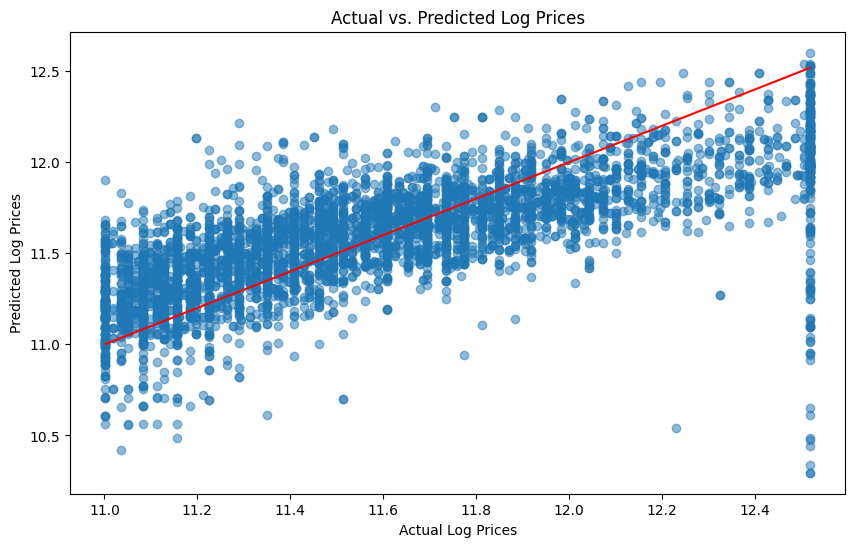

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_log, y_pred_log, alpha=0.5)
plt.xlabel('Actual Log Prices')
plt.ylabel('Predicted Log Prices')
plt.title('Actual vs. Predicted Log Prices')
plt.plot([min(y_test_log), max(y_test_log)], [min(y_test_log), max(y_test_log)], color='red')  # Diagonal line
plt.show()



# Residuals Distribution Analysis

After evaluating our model with the scatter plot, we proceed to analyze the residuals — the differences between the actual and predicted log prices. This analysis is crucial for understanding the variance in our model's predictions.

- A histogram is used to visualize the distribution of residuals.
- The number of bins is set to 30 for a detailed view of the distribution.
- The residuals are plotted along the x-axis, and their frequency (or count) is shown on the y-axis.

In an ideal scenario, the residuals would be normally distributed, centering around zero. This would indicate that our model's errors are random and notmoved. 



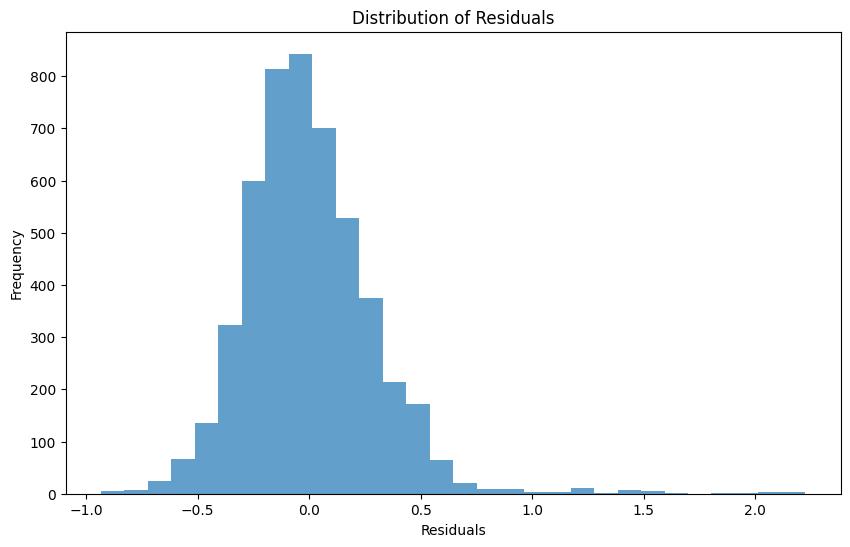

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


# Future Improvements

While our current model provides a baseline for predicting car prices, there’s room for enhancement. Future directions could include:

- **Advanced Feature Engineering**: Investigate more complex features, such as interactions between different variables or polynomial features, to capture more complex relationships in the data.
- **Model Complexity**: Experiment with more sophisticated models like Random Forest or Gradient Boosting to potentially improve predictions.
- **Hyperparameter Tuning**: Optimize the model's hyperparameters through techniques like grid search or random search.

- **Incorporate Additional Data**: Adding more contextual data or external factors that could influence car prices might enhance the model's predictive power.

Continued iteration and testing of these strategies will be key to improving the model's accuracy and reliability.
